In [221]:
drive_path = 'd:/'
import numpy as np
import pandas as pd
import os
import sys
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import variation
import h5py

In [222]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
from allensdk.brain_observatory.stimulus_analysis import StimulusAnalysis
from allensdk.brain_observatory.findlevel import findlevel

manifest_path = os.path.join(drive_path,'BrainObservatory','manifest.json')
boc = BrainObservatoryCache(manifest_file=manifest_path)

In [223]:
expMetaData = pd.DataFrame(boc.get_ophys_experiments())
SessionThreeMD = expMetaData[expMetaData.session_type=='three_session_B']

In [428]:
#PULL CSV file Complete for COV
for i, expt_id in enumerate(SessionThreeMD['id']):
    if i == 0:
        df = pd.read_csv("D:\BrainObservatory\ophys_analysis\%d_FinalCOV.csv" % expt_id)
    if i>0:
        tmp = pd.read_csv("D:\BrainObservatory\ophys_analysis\%d_FinalCOV.csv" % expt_id)
        df=df.append(tmp,ignore_index=False)
df.rename(columns={'0': 'Cell_Specimen_ID','0.1':'0'}, inplace=True)

In [434]:
CompleteCOV=pd.read_csv('D:\BrainObservatory\ophys_analysis\CompleteCSV.csv')
CompleteCOV.head()

,Cell_Specimen_ID,0,1,10,100,101,102,103,104,105,...,90,91,92,93,94,95,96,97,98,99
0,517474257,-37.163661,-4.819295,-64.293009,10.822364,-5.141347,-3.316109,6.418756,6.320111,-3.407752,...,-43.868286,-3.480598,6.381617,12.544482,-17.328312,-4.257135,-5.377617,-18.388208,8.332623,-4.138210
1,517474186,-17.671163,9.170737,12.182298,-15.386149,11.817678,-2.326474,-18.856384,30.671234,2.637282,...,7.516608,-5.051145,-8.872809,67.217899,2.695954,-6.087470,-13.035079,-13.214091,2.964624,-21.195605
2,517473440,-3.821970,4.535736,10.745387,-6.890688,51.798037,-54.493971,-12.359936,6.573470,-42.452159,...,10.303324,7.055967,-4.721811,-10.192151,24.159504,-27.636884,-5.416278,-2.592164,7.815550,2.673826
3,517473868,18.589068,45.919317,3.193498,9.821974,16.008231,-40.086730,-5.986298,-23.316908,3.289696,...,-5.564723,-5.892159,-25.468937,-8.242633,31.307218,9.996809,-100.523048,-38.383339,5.162948,4.634579
4,517473882,3.135496,5.032041,10.454683,-3.834420,6.889008,5.544534,31.558371,2.832072,-46.929562,...,-5.624368,11.022530,5.315972,-31.391600,14.484947,3.622181,-28.086226,40.848676,-8.603745,16.696975


In [513]:
cell_specimens_dfdf=pd.DataFrame(cell_specimens_df)
AllCells=cell_specimens_dfdf[~np.isnan(cell_specimens_dfdf.pref_image_ns)]
RelevCells_df=pd.DataFrame(AllCells, columns=['cell_specimen_id','pref_image_ns'])
# RelevCells_df.head()

VISpRClist=AllCells.loc[AllCells.area=='VISp']
VISpRC=pd.DataFrame(VISpRClist, columns=['cell_specimen_id','pref_image_ns'])

VISpmRClist=AllCells.loc[AllCells.area=='VISpm']
VISpmRC=pd.DataFrame(VISpmRClist, columns=['cell_specimen_id','pref_image_ns'])

VISlRClist=AllCells.loc[AllCells.area=='VISl']
VISlRC=pd.DataFrame(VISlRClist, columns=['cell_specimen_id','pref_image_ns'])

VISalRClist=AllCells[AllCells.area=='VISal']
VISalRC=pd.DataFrame(VISalRClist, columns=['cell_specimen_id','pref_image_ns'])

In [527]:
Cux2DF=SessionThreeMD[SessionThreeMD.cre_line == 'Cux2-CreERT2']
Cux2DF_expid=pd.DataFrame(Cux2DF.experiment_container_id)
for i, expid in enumerate(RelevCells['experiment_container_id']):
    

,experiment_container_id
5,511510998
11,511510715
17,511510779
19,511510870
23,511507650
24,511510836
27,511510645
32,511510667
35,511854338
41,511510695


In [521]:
# Cux2DF=SessionThreeMD[SessionThreeMD.cre_line == 'Cux2-CreERT2']
# for i, celltype in Cux2DF:
#     creline=str(int(Cux2DF.experiment_container_id[RelevCells_df.cell_specimen_id==cs_id]))
#     if i == 0:
#         csid_COV = pd.DataFrame({'Cell_Specimen_id': str(cs_id),'COV':CompleteCOV.loc[CompleteCOV.Cell_Specimen_ID==cs_id,pref_csid]})
#     if i>0:
#         tmp = pd.DataFrame({'Cell_Specimen_id': str(cs_id),'COV':CompleteCOV.loc[CompleteCOV.Cell_Specimen_ID==cs_id,pref_csid]})
#         csid_COV=csid_COV.append(tmp)

,age_days,cre_line,experiment_container_id,id,imaging_depth,session_type,targeted_structure
5,105.0,Cux2-CreERT2,511510998,506156402,175,three_session_B,VISal
11,152.0,Cux2-CreERT2,511510715,501929146,175,three_session_B,VISal
17,132.0,Cux2-CreERT2,511510779,503019786,275,three_session_B,VISp
19,101.0,Cux2-CreERT2,511510870,509799475,275,three_session_B,VISl
23,156.0,Cux2-CreERT2,511507650,501794235,175,three_session_B,VISp


In [ ]:
for i, celltype in cre_line == 'Cux2-CreERT2'
Cux2RClist=AllCells[AllCells.area=='VISp']
Cux2RC=pd.DataFrame(Cux2RClist, columns=['cell_specimen_id','pref_image_ns'])
                    
# RorbRClist=AllCells[AllCells.area=='Rorb']
# RorbRC=pd.DataFrame(RorbRClist, columns=['cell_specimen_id','pref_image_ns'])

# Rbp4RClist=AllCells[AllCells.area=='R']
# Rbp4RC=pd.DataFrame(Rbp4RClist, columns=['cell_specimen_id','pref_image_ns'])
                    
# ScnnlaRClist=AllCells[AllCells.area=='Rorb']
# ScnnlaRC=pd.DataFrame(ScnnlaRClist, columns=['cell_specimen_id','pref_image_ns'])

In [442]:
for i, cs_id in enumerate(RelevCells['cell_specimen_id']):
    pref_csid=str(int(RelevCells_df.pref_image_ns[RelevCells_df.cell_specimen_id==cs_id]))
    if i == 0:
        csid_COV = pd.DataFrame({'Cell_Specimen_id': str(cs_id),'COV':CompleteCOV.loc[CompleteCOV.Cell_Specimen_ID==cs_id,pref_csid]})
    if i>0:
        tmp = pd.DataFrame({'Cell_Specimen_id': str(cs_id),'COV':CompleteCOV.loc[CompleteCOV.Cell_Specimen_ID==cs_id,pref_csid]})
        csid_COV=csid_COV.append(tmp)

#for i, cs_id in enumerate(RelevCells['cell_specimen_id']):
#    =RelevCells_df.pref_image_ns[RelevCells_df.cell_specimen_id==cs_id]
# for i, expt_id in enumerate(RelevCells['cell_specimen_id']):
#     col_str="%d" % int(RelevCells.loc[i]['pref_image_ns'])
#     df['cell_specimen_id' == expt_it][col_str]
#     if i == 0:
#         newdfRelevCells['cell_specimen_id']=
csid_COV.head()

,COV,Cell_Specimen_id
2661,-3.340145,517394843
2508,9.572764,517394850
2679,-5.470429,517394870
2668,-5.031625,517394874
2678,1.963857,517394878


In [472]:
#csidCOVheatmap=csidCOVheatmap
csid_COV_hm=pd.DataFrame(csid_COV,columns=['COV'])

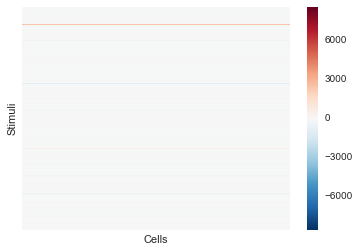

In [473]:
ax=seaborn.heatmap(csid_COV_hm,xticklabels=False,yticklabels=False)
plt.xlabel('Cells')
plt.ylabel('Stimuli')

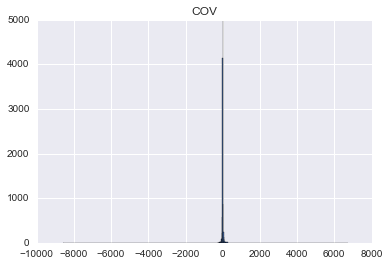

In [466]:
csid_COV.hist(column='COV',bins=1000);

In [433]:
#df.to_csv('D:\BrainObservatory\ophys_analysis\CompleteCSV.csv',index=False)

In [224]:
# #PULL HF5 file
# #Get Mean Sweep with cell specimen ids
# for i, exp_id in enumerate(SessionThreeMD['id']):
#     if i==0:
#         df=pd.read_csv("D:\BrainObservatory\ophys_analysis\%d_MeanSweep.csv" % expt_id)
#     if i>0:
#         tmp=pd.read_csv("D:\BrainObservatory\ophys_analysis\%d_MeanSweep.csv" % expt_id)
        
#     df = pd.read_csv("D:\BrainObservatory\ophys_analysis\%d_MeanSweep.csv" % expt_id)
#     exp=boc.get_ophys_experiment_data(ophys_experiment_id = exptnum)
#     expcells=exp.get_cell_specimen_ids()
#     CellSpecimenIDList=expcells.tolist()
#     CellSpecimenIDs=pd.DataFrame(CellSpecimenIDList)
#     naturalscenelist=exp.get_stimulus_table('natural_scenes')
#     return df
#     #else:
#        # df.append(read_csv...)
#         #tmp=(pd.DataFrame(variation(SortedGF.iloc[:,1:],axis=0))).T
#         #SortedGFD=SortedGFD.append(tmp,ignore_index=True)

In [260]:
# expt_id=512149367
# expContainerID = SessionThreeMD.experiment_container_id[SessionThreeMD.id==expt_id]
# expContainerID
# #Experiment=SessionThreeMD[SessionThreeMD.id==512149367]
# # expContainerID=Experiment.experiment_container_id
# cell_specimens_df = boc.get_cell_specimens()

In [279]:
#AllCells.keys()

Index([u'area', u'cell_specimen_id', u'dsi_dg', u'experiment_container_id',
       u'imaging_depth', u'osi_dg', u'osi_sg', u'p_dg', u'p_ns', u'p_sg',
       u'pref_dir_dg', u'pref_image_ns', u'pref_ori_sg', u'pref_phase_sg',
       u'pref_sf_sg', u'pref_tf_dg', u'time_to_peak_ns', u'time_to_peak_sg',
       u'tld1_id', u'tld1_name', u'tld2_id', u'tld2_name', u'tlr1_id',
       u'tlr1_name'],
      dtype='object')

In [259]:
# for i, expt_id in enumerate(SessionThreeMD['id']):
#     expContainerID = SessionThreeMD.experiment_container_id[SessionThreeMD.id==expt_id]
#     cell_specimens_df = pd.DataFrame(boc.get_cell_specimens(experiment_container_ids=expContainerID))
#     if i == 0:
#         PrefStim=pd.DataFrame(cell_specimens_df, columns=['cell_specimen_id','pref_image_ns'])
#     if i > 0:
#         tmp = pd.DataFrame(cell_specimens_df, columns=['cell_specimen_id','pref_image_ns'])
#         PrefStim=PrefStim.append(tmp)
# PrefStim
# #GoodCells=PrefStim.dropna()

,cell_specimen_id,pref_image_ns


In [194]:
#df.shape

(12036, 120)

In [210]:
# cell_specimens_df = pd.DataFrame(boc.get_cell_specimens(experiment_container_ids=[expContainerID]))
# PrefStim=pd.DataFrame(cell_specimens_df, columns=['cell_specimen_id','pref_image_ns'])
# #for i in (df['pref_image_ns']):
#     #if i == nan:
#         #continue
# PrefStim['pref_image_ns'='110']

SyntaxError: invalid syntax (<ipython-input-210-f4698e455a1f>, line 6)

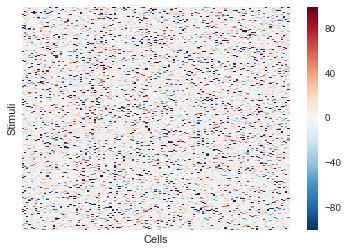

In [440]:
ax=seaborn.heatmap(df.iloc[:,1:],vmin=-100,vmax=100,xticklabels=False,yticklabels=False)
plt.xlabel('Cells')
plt.ylabel('Stimuli')

In [216]:
# #expID=506278598
# #df=pd.read_hdf('D:\BrainObservatory\ophys_analysis\%d_three_session_B_analysis.h5'%(expID),'analysis/mean_sweep_response_ns')
# #del df['dx']
# #Experiment=SessionThreeMD[SessionThreeMD.id==expID]
# #expContainerID=Experiment.experiment_container_id.values
# #exp=boc.get_ophys_experiment_data(ophys_experiment_id = expID)
# cell_specimens_df = pd.DataFrame(boc.get_cell_specimens(experiment_container_ids=[expContainerID]))
# PrefStim=pd.DataFrame(cell_specimens_df, columns=['cell_specimen_id','pref_image_ns'])
# GoodCells=PrefStim.dropna()
# #Cell_SID=pd.DataFrame(PrefStim['cell_specimen_id'])
# GoodCells

,cell_specimen_id,pref_image_ns
0,517473162,110.0
1,517473175,114.0
2,517473192,43.0
3,517473204,45.0
4,517473223,26.0
5,517473236,63.0
6,517473250,99.0
7,517473270,45.0
9,517473292,41.0
12,517473348,75.0
